**Import the Necessary Libraries**:

In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [58]:

data = pd.read_csv('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
data.shape

(200, 5)

In [60]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [61]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [62]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [63]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [64]:
males_age = data[data['Gender']=='Male']['Age']
females_age = data[data['Gender']=='Female']['Age']

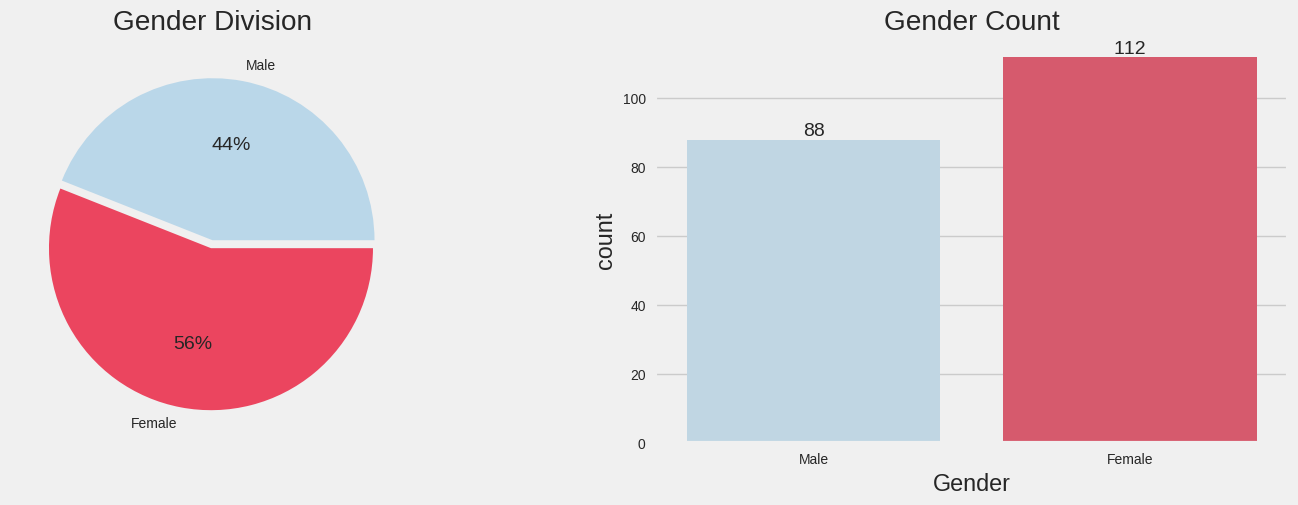

In [65]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,5))

plt.subplot(1,2,1)
palette_color = ['#BAD7E9', '#EB455F']
sizes = [males_age.count(), females_age.count()]
gender = ['Male', 'Female']
plt.pie(sizes, labels=gender, colors=palette_color, explode=(0, 0.05), autopct='%.0f%%')
plt.title('Gender Division')

plt.subplot(1,2,2)
ax = sns.countplot(x = 'Gender' , data = data, palette=palette_color)
for label in ax.containers:
    ax.bar_label(label)
plt.title('Gender Count')

plt.show()

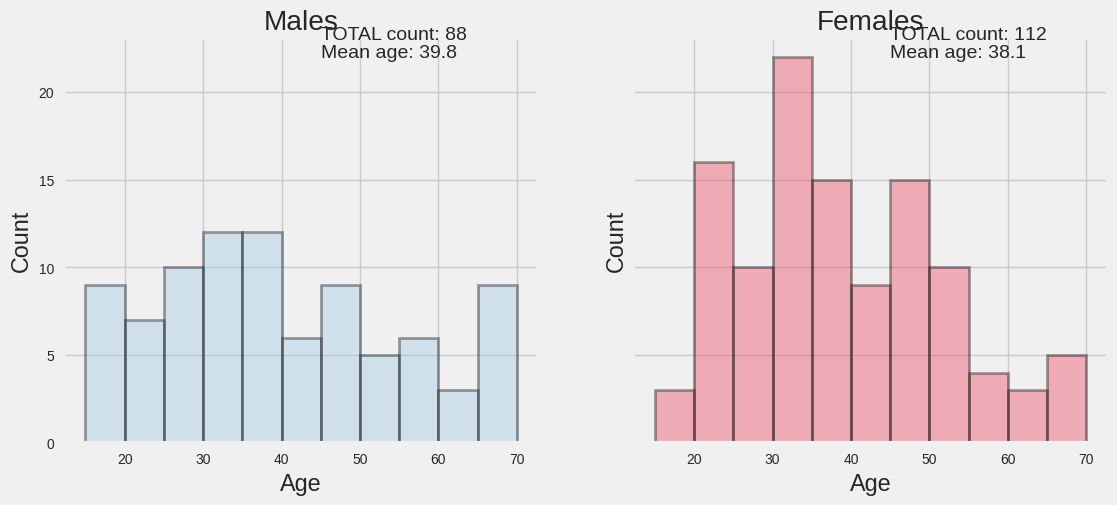

In [66]:
age_bins = range(15,75,5)
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#9ECAE1', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))

ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))
sns.distplot(females_age, bins=age_bins, kde=False, color='#EB455F', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))

ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

#### **Ploting relations  between Age , Annual Income and Spending Score**

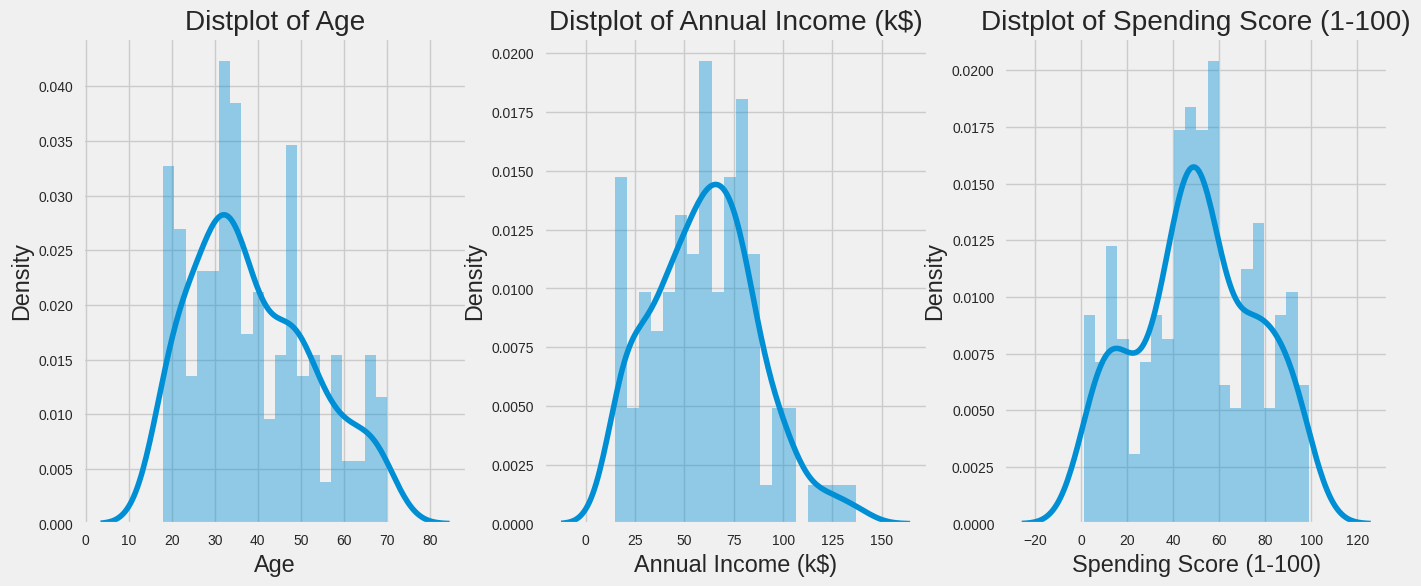

In [67]:
plt.figure(1 , figsize = (15 , 6))
n = 0

for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))

plt.show()

#### **Plot Distribution column Age, Annual Income, and Spending Score relate each other.**

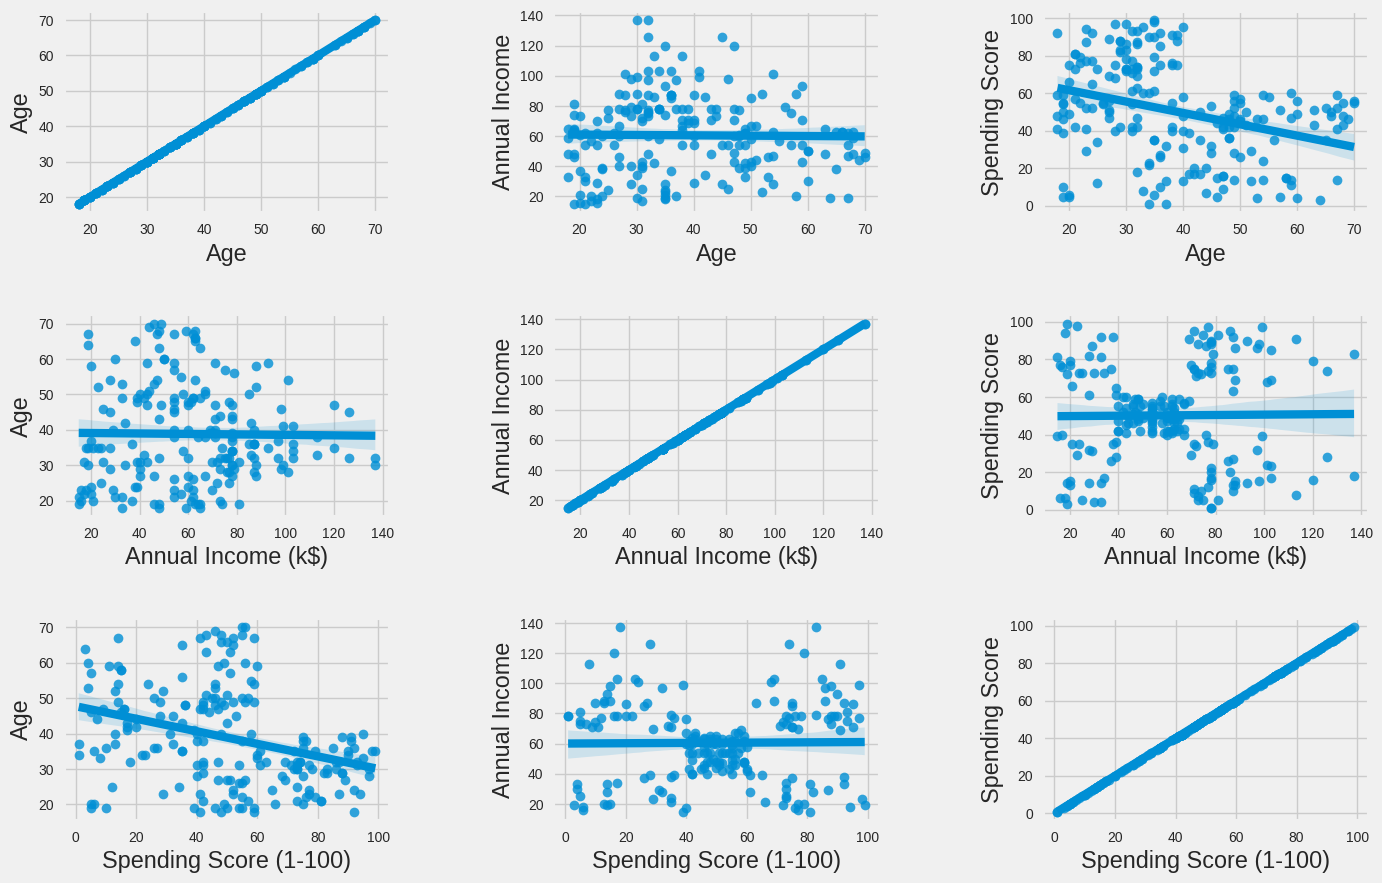

In [68]:
plt.figure(1 , figsize = (15 , 10))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [69]:

selected_cols = ["Spending Score (1-100)", "Annual Income (k$)", "Age"]
cluster_data = data.loc[:,selected_cols]

In [70]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

`fit_transform` -> fit our cluster_data (Age, Spending Score, and Annual Income) to scale formating (standarization)

In [71]:
from sklearn.cluster import KMeans
wcss=[]

In [72]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)

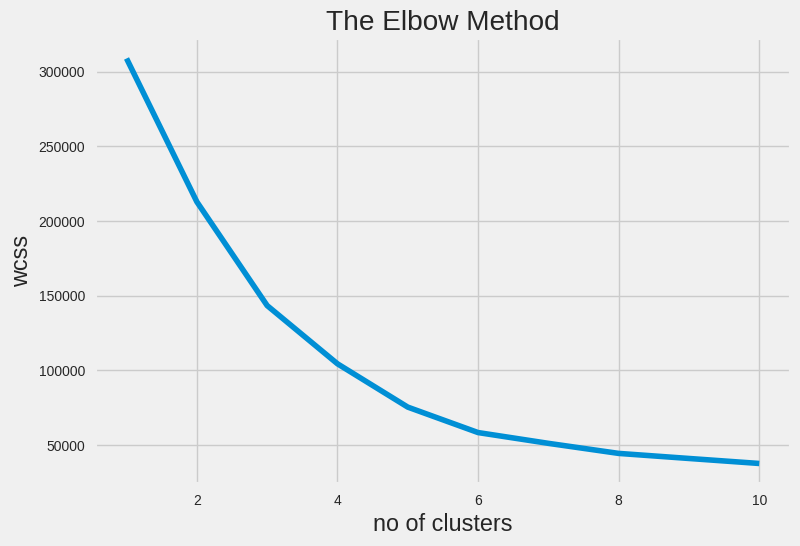

In [73]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

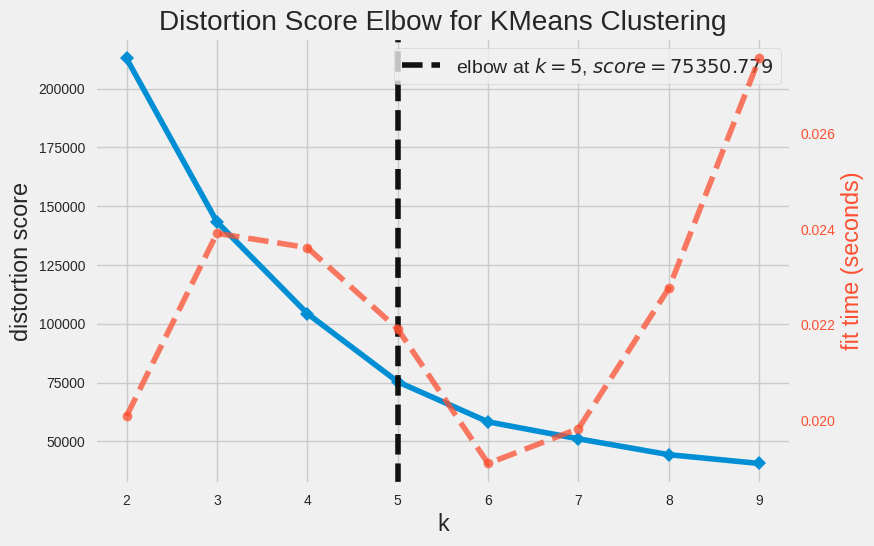

In [74]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(cluster_data)
visualizer.show()
plt.show()

In [75]:
KM = KMeans(n_clusters=5, init='k-means++').fit(cluster_data) # initialise and fit K-Means model

KM5_clustered = cluster_data.copy()
KM5_clustered.loc[:,'Cluster'] = KM.labels_ # append labels to points

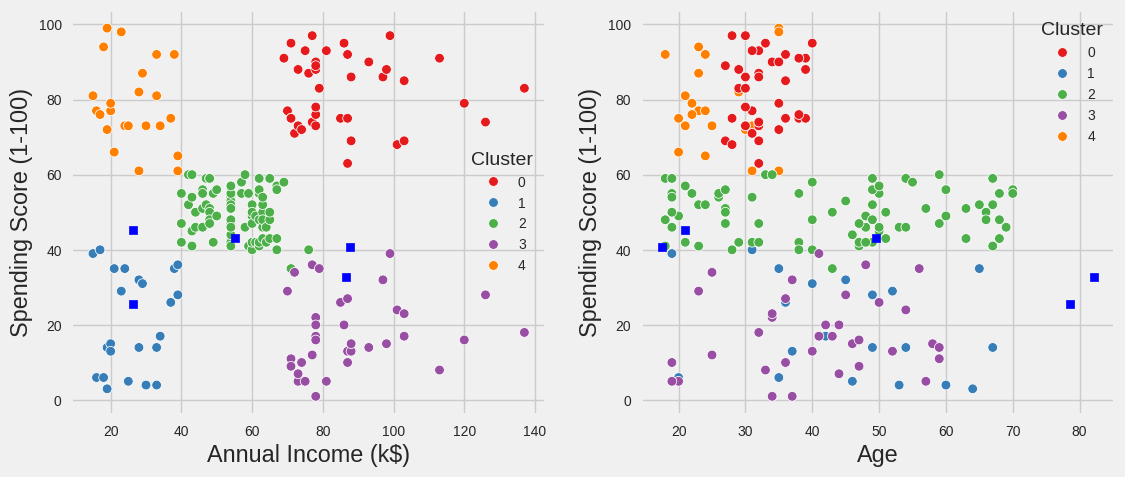

In [76]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered, hue='Cluster',
                ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered, hue = 'Cluster',
                palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM.cluster_centers_[:,1],KM.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,2], marker='s', s=40, c="blue")

In [77]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,39
1,23
2,79
3,36
4,23


#### **Visualize in 3D**

In [78]:
import plotly as py
import plotly.graph_objs as go

In [83]:
def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )


In [84]:
trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)